37800.0
                         0   1   2   3   4   5   6   7   8   9  ...  44  45  \
MalcolmHill              0   0   0   0   0   0   0   0   1   1  ...   2   2   
CatBarber                0   0   0   0   0   0   0   0   0   0  ...   1   1   
ChaundeeBrown Jr.        2   2   2   2   2   2   2   2   1   1  ...   1   1   
CameronOliver            0   0   0   0   0   0   0   0   0   0  ...   2   2   
WesIwundu                1   1   1   1   1   1   1   1   1   1  ...   2   2   
LanceStephenson          0   0   0   0   0   0   0   0   1   1  ...   2   2   
SolomonHill              1   1   1   1   1   1   2   2   3   4  ...   2   3   
SharifeCooper            0   0   0   0   0   0   0   0   0   0  ...   0   3   
KevinKnox II             0   0   0   0   0   0   0   0   0   1  ...   5   6   
SkylarMays               5   5   5   4   4   4   4   3   4   3  ...   7   9   
CamReddish               7   7   7   7   7   7   8   9  25  32  ...  15  15   
GorguiDieng              3   3   3   3   3  

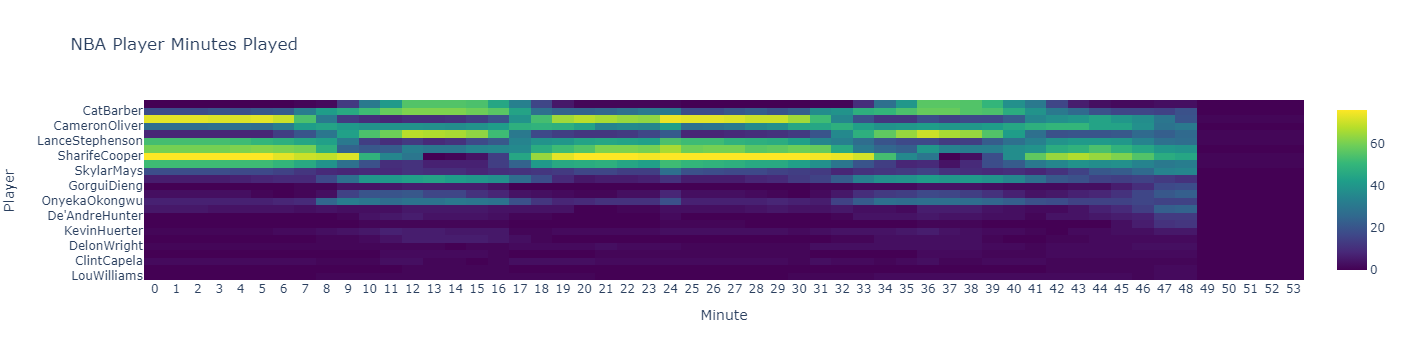

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
df = pd.read_csv('rotations/2022.csv')

# Convert the times to seconds
df['start'] = df['IN_TIME_REAL']
df['end'] = df['OUT_TIME_REAL']
df['Player'] = df['PLAYER_FIRST']+df['PLAYER_LAST']
print(df['end'].max())
df['start'] /=600
df['end']/=600

# Define the data
teams = df.TEAM_ID.unique().tolist()
team_id = teams[0]
games = df.GAME_ID.unique().tolist()
game_id =games[0]
#df = df.sort_values(by=['0'])
df = df[df.TEAM_ID==team_id]

players = df['Player'].unique()

# Identify the maximum end time to determine the total duration
max_end_minute = round(df['end'].max())

# Create an empty matrix to represent player minutes played
minutes_played_matrix=  pd.DataFrame(index=players, columns=range(max_end_minute + 1), data=0)
minutes_played_matrix= minutes_played_matrix.iloc[::-1]
# Increment the matrix based on player on-court times
for _, row in df.iterrows():
    player = row['Player']
    start_minute = row['start']
    end_minute = row['end']
    minutes_played_matrix.loc[player, start_minute:end_minute] += 1
minutes_played_matrix.columns = [str(i) for i in range(0,54)]

print(minutes_played_matrix)
# Create the heatmap
#minutes_played_matrix.sort_index(axis=22,inplace=True)

fig = go.Figure(data=go.Heatmap(z=minutes_played_matrix.values,
                                x=minutes_played_matrix.columns,
                                y=players,
                                colorscale='Viridis'))

# Customize the layout
fig.update_layout(title='NBA Player Minutes Played',
                  xaxis_title='Minute',
                  yaxis_title='Player')

# Show the plot
fig.show()



In [ ]:
import plotly.graph_objs as go

def broken_bars(xstart, xwidth, ystart, yh, colors):
    #xstart - list of x-start coord for each bar
    #xwidth = list of bar widths
    #ystart - number y-start coord for each bar
    #yh - number- height of eah bar
    #colors = list of bar colors
    
    if len(xstart) != len(xwidth) or  len(xstart) != len(colors):
        raise ValueError('xstart, xwidth and colors must have the same length')
    shapes = []    
    for k in range(len(xstart)):
        shapes.append(dict(type="rect",
                           x0=xstart[k],
                           y0=ystart,
                           x1=xstart[k] + xwidth[k],
                           y1=ystart+yh,
                           fillcolor=colors[k],
                           line_color=colors[k]))
    return shapes    
# taken from https://community.plotly.com/t/broken-barh-plot/36496/2
fig = go.Figure()
fig.update_layout(width=1000, height=625,
                  xaxis_range = [xmin,xmax],
                  yaxis_range = [0,len(players)],
                  shapes=broken_bars([10, 100, 130 ], [50, 20, 10], 20, 9, 
                                     colors=['orange', 'green', 'red' ]))

In [ ]:
raw_game = f'https://cdn.nba.com/static/json/liveData/playbyplay/playbyplay_{game_id}.json'
page = requests.get(raw_game)
j = json.loads(page.content)
df = pd.DataFrame(j['game']['actions'])

In [ ]:
x_max = df['end'].max()

In [ ]:
x_max

In [ ]:
import plotly.figure_factory as ff
df['Task'] = df['fullname']
df['Start'] = df['start']
df['Finish'] = df['end']
fig = ff.create_gantt(df)
fig.show()

In [ ]:
df.columns